In [2]:
import numpy as np
import math
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
import statistics

# Load the dataset
df = pd.read_csv("Classification of Robots from their conversation sequence.csv")
# Display the first 10 rows of the dataset
print(df.head(10))
print(df.shape)

   Robot   num1    num2     num3     num4      num5       num6       num7  \
0      1      2       5        2        5         6          2          1   
1      2   1747    1749     1751     1758      1765       1767       1772   
2      3  65056  195168  1561344  7806720  31226880  187361280  749445120   
3      4   2855    2860     2865     2870      2875       2880       2885   
4      5  11440   57200   286000  1430000   7150000   35750000  178750000   
5      1      4       9        5        4         8          6          6   
6      2   1487    1491     1498     1503      1512       1514       1518   
7      3  18850   18850   113100   452400    452400    1809600    3619200   
8      4   8962    8967     8972     8977      8982       8987       8992   
9      5   2870   14350    71750   358750   1793750    8968750   44843750   

           num8          num9         num10  
0  8.000000e+00  1.000000e+00  3.000000e+00  
1  1.774000e+03  1.783000e+03  1.785000e+03  
2  6.745006e+0

In [3]:
# Assuming your DataFrame is named df
X = df[['num1', 'num2', 'num3', 'num4', 'num5', 'num6', 'num7', 'num8', 'num9', 'num10']]  # Features
y = df['Robot']  # Labels


# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
#scaler = Normalizer()
#X_train_normalized = scaler.fit_transform(X_train)
#X_test_normalized = scaler.transform(X_test)

# MODEL_Trainer = SVC(C=10000, kernel='rbf')

# This takes too long to run
# MODEL_Trainer.fit(X_train_normalized, y_train)

In [5]:
# Predict the trained model on our test data

# This takes too long to run
# y_pred = MODEL_Trainer.predict(X_test_normalized)

# Print the Classification Report and Confusion Matrix
# print("Classification Report:")
# print(classification_report(y_test, y_pred))
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis', xticklabels=['1', '2', '3', '4', '5'], yticklabels=['1', '2', '3', '4', '5'])

In [7]:
chunk_number = 10
chunk_size = math.ceil(len(y_train) / chunk_number)
x_chunked = {}
y_chunked = {}
m = 0

for i in range(0, len(y_train), chunk_size):
    if m == chunk_number-1:
        chunk_size = len(X_train) - m * chunk_size
    x_chunked[str("chunk"+str(m))] = X_train[i:i+chunk_size]
    y_chunked[str("chunk"+str(m))] = y_train[i:i+chunk_size]
    print(chunk_size)
    m = m + 1

for i in range(chunk_number):
    Data_M = x_chunked[str("chunk"+str(i))].copy()
    Data_labels_M = y_chunked[str("chunk"+str(i))].copy()
    SVMC = Pipeline(steps=[('Normal', Normalizer()), ('SVMC', SVC(C=1000000, kernel='rbf'))])
    SVMC.fit(Data_M, Data_labels_M)
    pickle.dump(SVMC, open(str("SV_Models\\SVMC"+str(i)+".pkl"), 'wb'))
    print(i)

OUT_SVMC={}
store = [[0 for col in range(chunk_number)] for row in range(len(y_test))]
Lables_SVMC_predicted=[[0 for col in range(1)] for row in range(len(y_test))]

for i in range(0,chunk_number):
    SVMC1 = pickle.load(open(str('SV_Models\\SVMC' + str(i) + '.pkl'), 'rb'))
    OUT_SVMC[str("chunk"+str(i))] = SVMC1.predict(X_test)
    print(i)

for j in range(0,len(X_test)):
    for i in range(0,chunk_number):
        store[j][i]=OUT_SVMC[str("chunk"+str(i))][j]
        Lables_SVMC_predicted[j]=statistics.mode(store[j])

40000
40000
40000
40000
40000
40000
40000
40000
40000
40000
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


              precision    recall  f1-score   support

           1       1.00      1.00      1.00     19909
           2       0.52      0.91      0.67     20027
           3       1.00      0.99      1.00     20166
           4       0.66      0.17      0.27     20024
           5       0.99      1.00      1.00     19874

    accuracy                           0.81    100000
   macro avg       0.84      0.81      0.78    100000
weighted avg       0.83      0.81      0.78    100000



<Axes: >

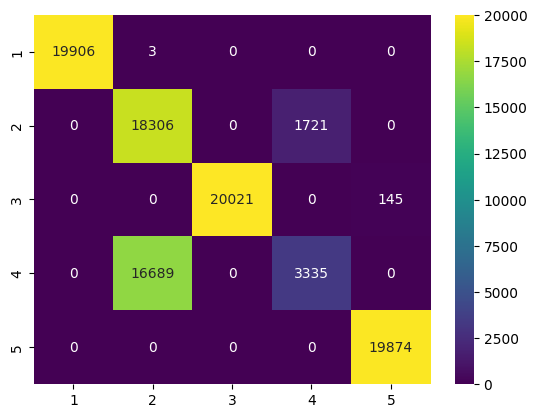

In [16]:
print(classification_report(y_test, Lables_SVMC_predicted))
sns.heatmap(confusion_matrix(y_test, Lables_SVMC_predicted), annot=True, fmt='d', cmap='viridis', xticklabels=['1', '2', '3', '4', '5'], yticklabels=['1', '2', '3', '4', '5'])

In [17]:
chunk_number = 20
chunk_size = math.ceil(len(y_train) / chunk_number)
x_chunked = {}
y_chunked = {}
m = 0

for i in range(0, len(y_train), chunk_size):
    if m == chunk_number-1:
        chunk_size = len(X_train) - m * chunk_size
    x_chunked[str("chunk"+str(m))] = X_train[i:i+chunk_size]
    y_chunked[str("chunk"+str(m))] = y_train[i:i+chunk_size]
    print(chunk_size)
    m = m + 1

for i in range(chunk_number):
    Data_M = x_chunked[str("chunk"+str(i))].copy()
    Data_labels_M = y_chunked[str("chunk"+str(i))].copy()
    SVMC = Pipeline(steps=[('Normal', Normalizer()), ('SVMC', SVC(C=1000000, kernel='rbf'))])
    SVMC.fit(Data_M, Data_labels_M)
    pickle.dump(SVMC, open(str("SV_Models\\SVMC"+str(i)+".pkl"), 'wb'))
    print(i)

OUT_SVMC={}
store = [[0 for col in range(chunk_number)] for row in range(len(y_test))]
Lables_SVMC_predicted=[[0 for col in range(1)] for row in range(len(y_test))]

for i in range(0,chunk_number):
    SVMC1 = pickle.load(open(str('SV_Models\\SVMC' + str(i) + '.pkl'), 'rb'))
    OUT_SVMC[str("chunk"+str(i))] = SVMC1.predict(X_test)
    print(i)

for j in range(0,len(X_test)):
    for i in range(0,chunk_number):
        store[j][i]=OUT_SVMC[str("chunk"+str(i))][j]
        Lables_SVMC_predicted[j]=statistics.mode(store[j])

20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


              precision    recall  f1-score   support

           1       1.00      1.00      1.00     19909
           2       0.52      0.90      0.66     20027
           3       1.00      0.99      1.00     20166
           4       0.63      0.18      0.28     20024
           5       0.99      1.00      1.00     19874

    accuracy                           0.81    100000
   macro avg       0.83      0.81      0.79    100000
weighted avg       0.83      0.81      0.79    100000



<Axes: >

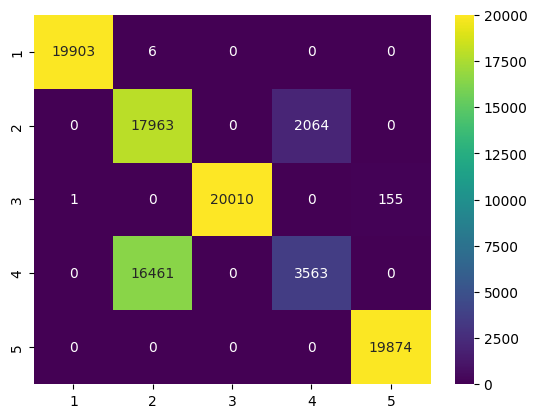

In [18]:
print(classification_report(y_test, Lables_SVMC_predicted))
sns.heatmap(confusion_matrix(y_test, Lables_SVMC_predicted), annot=True, fmt='d', cmap='viridis', xticklabels=['1', '2', '3', '4', '5'], yticklabels=['1', '2', '3', '4', '5'])

In [19]:
Cs= [1,10,100,1000,10000,100000, 1000000]
OUT_SVMC2 = {}
for C in Cs:
    for i in range(chunk_number):
        Data_M = x_chunked[str("chunk"+str(i))].copy()
        Data_labels_M = y_chunked[str("chunk"+str(i))].copy()
        SVMC = Pipeline(steps=[('Normal', Normalizer()), ('SVMC', SVC(C=C, kernel='rbf'))])
        SVMC.fit(Data_M, Data_labels_M)
        print(i)
        OUT_SVMC2[str("chunk"+str(i))] = SVMC.predict(X_test)

0
1
2


KeyboardInterrupt: 

In [ ]:
chunk_number = 40
chunk_size = math.ceil(len(y_train) / chunk_number)
x_chunked = {}
y_chunked = {}
m = 0

for i in range(0, len(y_train), chunk_size):
    if m == chunk_number-1:
        chunk_size = len(X_train) - m * chunk_size
    x_chunked[str("chunk"+str(m))] = X_train[i:i+chunk_size]
    y_chunked[str("chunk"+str(m))] = y_train[i:i+chunk_size]
    print(chunk_size)
    m = m + 1

for i in range(chunk_number):
    Data_M = x_chunked[str("chunk"+str(i))].copy()
    Data_labels_M = y_chunked[str("chunk"+str(i))].copy()
    SVMC = Pipeline(steps=[('Normal', Normalizer()), ('SVMC', SVC(C=1000000, kernel='rbf'))])
    SVMC.fit(Data_M, Data_labels_M)
    pickle.dump(SVMC, open(str("SV_Models\\SVMC"+str(i)+".pkl"), 'wb'))
    print(i)

OUT_SVMC={}
store = [[0 for col in range(chunk_number)] for row in range(len(y_test))]
Lables_SVMC_predicted=[[0 for col in range(1)] for row in range(len(y_test))]

for i in range(0,chunk_number):
    SVMC1 = pickle.load(open(str('SV_Models\\SVMC' + str(i) + '.pkl'), 'rb'))
    OUT_SVMC[str("chunk"+str(i))] = SVMC1.predict(X_test)
    print(i)

for j in range(0,len(X_test)):
    for i in range(0,chunk_number):
        store[j][i]=OUT_SVMC[str("chunk"+str(i))][j]
        Lables_SVMC_predicted[j]=statistics.mode(store[j])

In [ ]:
print(classification_report(y_test, Lables_SVMC_predicted))
sns.heatmap(confusion_matrix(y_test, Lables_SVMC_predicted), annot=True, fmt='d', cmap='viridis', xticklabels=['1', '2', '3', '4', '5'], yticklabels=['1', '2', '3', '4', '5'])